Database from Kaggle:
https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

Exploratory Data Analysis of Aviation Accident Database has been prepared. The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

The aim of the analysis is to get the knowledge / understand how to improve the quality and safety of travelling by airplane 
and predict the probability of dying in plane crash  (modelling of death ratio).

Conclusions:

-Most accidents occur in the summer, with the peak in July.  
-Accidents are more likely during good weather conditions (visual meteorological conditions).  
-Certain regions in the United States, such as California, Alaska, Florida, and Texas, exhibit an increased probability of accidents.  
-Specific airplane makes are more frequently involved in crashes.  
-The takeoff and landing phases pose the highest risk during a flight.  
-Over 50% of accidents happen during personal flights.  


Recommendations:  

Considering the above findings, it is advisable to strengthen safety regulations and procedures, especially focusing on protocols for good weather conditions. Initiatives such as training programs, awareness campaigns, and the promotion of responsible flying can contribute to reducing risky behavior, thereby lowering accident rates.

Moreover, the higher accident rates in mentioned states underscore the importance of reviewing safety regulations at airports within those regions.

Given that a significant number of accidents occur during personal flights, a re-evaluation of the pilot's licensing process is warranted.

Additionally, a more in-depth analysis of specific makes and models of airplanes, incorporating detailed technical data, would provide a comprehensive understanding of their impact on accident rates.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape, r2_score

In [3]:
aviation = pd.read_csv("AviationData.csv", encoding='latin-1', low_memory=False)


In [4]:
pd.set_option('display.max_columns', None)
aviation.shape

(88889, 31)

In [5]:
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
aviation.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
52999,20020712X01107,Accident,LAX02LA217,2002-07-07,"HONOLULU, HI",United States,21.391666,-157.833333,NaN,Remote Landing Zone,Non-Fatal,Substantial,NaN,N141MK,Aerospatiale,AS350 BA,No,1.0,Turbo Shaft,NaN,NSCH,NaN,NaN,NaN,NaN,NaN,4.0,VMC,Landing,Probable Cause,29-09-2004
73752,20130621X60549,Accident,CEN13LA365,2013-06-19,"Lansing, MI",United States,424724N,0843524W,LAN,Capital Region International A,Non-Fatal,Substantial,Airplane,N4296T,PIPER,PA-32-301T,No,1.0,Reciprocating,091,NaN,Personal,Pilot,0.0,0.0,0.0,1.0,VMC,NaN,The pilots failure to follow the airplane che...,25-09-2020
53727,20021113X05464,Accident,ANC03LA013,2002-10-29,"LARSON BAY, AK",United States,57.533333,-153.966667,NaN,NaN,Non-Fatal,Substantial,NaN,N5355D,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,NaN,NaN,NaN,2.0,VMC,Approach,Probable Cause,23-07-2003
19671,20001213X25010,Accident,BFO88FA022,1988-02-17,"SO. CHARLESTON, WV",United States,NaN,NaN,WV12,MALLORY,Fatal(1),Destroyed,NaN,N9399U,Cessna,150M,No,1.0,Reciprocating,NaN,NaN,Instructional,NaN,1.0,1.0,2.0,0.0,VMC,Takeoff,Probable Cause,25-09-1989
3165,20020917X05071,Accident,NYC83FNE01,1982-10-31,"DURHAM, CT",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N3983A,Fairchild,M-62A-3,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,2.0,0.0,0.0,VMC,Climb,Probable Cause,31-10-1983
13854,20010110X00196,Accident,LAX86FVD04,1986-01-25,"FORTUNA, CA",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N661S,Vangrunsven,RV-3A,Yes,1.0,Reciprocating,NaN,NaN,Personal,NaN,1.0,0.0,0.0,0.0,VMC,Takeoff,Probable Cause,NaN
38199,20001207X04177,Accident,BFO95LA094,1995-08-29,"COLUMBIANA, OH",United States,NaN,NaN,02G,COLUMBIANA COUNTY AIRPORT,Non-Fatal,Destroyed,NaN,N6921L,Cessna,310K,No,2.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,1.0,0.0,VMC,Landing,Probable Cause,19-12-1995
73593,20130909X11748,Accident,ERA13WA403,2013-05-22,"Dajabon, Las Americas",Dominican Republic,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,HI 912,CESSNA,A188B,No,NaN,NaN,NUSN,NaN,Aerial Application,Agriasa,0.0,0.0,0.0,1.0,VMC,NaN,NaN,03-11-2020
39798,20001208X06045,Accident,LAX96LA246,1996-06-12,"SEDONA, AZ",United States,NaN,NaN,SEZ,SEDONA,Non-Fatal,Substantial,NaN,N12341,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,29-04-1997
18676,20001213X32108,Accident,LAX87FA337,1987-09-14,"CORONA, CA",United States,NaN,NaN,L66,NaN,Non-Fatal,Destroyed,NaN,N902RG,Piper,AEROSTAR 601P,No,2.0,Reciprocating,NaN,NaN,Business,NaN,0.0,1.0,1.0,0.0,VMC,Climb,Probable Cause,03-07-1989


In [7]:
aviation.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [8]:
#creating a copy of an original dataframe
original_aviation = aviation.copy()

In [9]:
aviation.keys()

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [10]:
#listing columns that contain Nans (As there are 27 columns that are incomplete, there is a need to consider how to handle the issue.)
missing_data_col = aviation.columns[aviation.isna().any()].tolist()
missing_data_col, len(missing_data_col)

(['Location',
  'Country',
  'Latitude',
  'Longitude',
  'Airport.Code',
  'Airport.Name',
  'Injury.Severity',
  'Aircraft.damage',
  'Aircraft.Category',
  'Registration.Number',
  'Make',
  'Model',
  'Amateur.Built',
  'Number.of.Engines',
  'Engine.Type',
  'FAR.Description',
  'Schedule',
  'Purpose.of.flight',
  'Air.carrier',
  'Total.Fatal.Injuries',
  'Total.Serious.Injuries',
  'Total.Minor.Injuries',
  'Total.Uninjured',
  'Weather.Condition',
  'Broad.phase.of.flight',
  'Report.Status',
  'Publication.Date'],
 27)

In [11]:
#creating a function removing columns with missing data above established threshold and listing the removed columns

def drop_columns(df, thr = 0.5):
    missing_percentages = df.isna().mean()
    col_to_drop = missing_percentages[missing_percentages > thr].index
    new_df=df.drop(columns = col_to_drop)
    return new_df, list(col_to_drop)
    
    

In [12]:
# There are 6 columns to be removed when threshold 0.5 is applied.
dropped_col_df, dropped_columns = drop_columns(aviation, 0.5)
dropped_columns

['Latitude',
 'Longitude',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

In [13]:
# There are 8 columns to be removed when threshold 0.4 is applied/
dropped_col_df, dropped_columns = drop_columns(aviation, 0.4)
dropped_columns

['Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

In [14]:
#I decide to perform an analysis applying the threshold 0.4.

dropped_col_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [15]:
#  checking the number of missing values


from tabulate import tabulate

def check_missing_values(df):
    pd.set_option('display.max_rows', None)
    print("The number of missing values in each column:")
    table_data = []
    for column in df.columns:
        missing_count = df[column].isna().sum()
        table_data.append([column, missing_count])

    print(tabulate(table_data, headers = ["Column", "No. of missing values"], tablefmt = "grid"))

    pd.reset_option('display.max_rows', None)

In [16]:
check_missing_values(dropped_col_df)

The number of missing values in each column:
+------------------------+-------------------------+
| Column                 |   No. of missing values |
+========================+=========================+
| Event.Id               |                       0 |
+------------------------+-------------------------+
| Investigation.Type     |                       0 |
+------------------------+-------------------------+
| Accident.Number        |                       0 |
+------------------------+-------------------------+
| Event.Date             |                       0 |
+------------------------+-------------------------+
| Location               |                      52 |
+------------------------+-------------------------+
| Country                |                     226 |
+------------------------+-------------------------+
| Injury.Severity        |                    1000 |
+------------------------+-------------------------+
| Aircraft.damage        |                    3194 |
+

In [17]:
#changing date (presented as string) to date format 
dropped_col_df["Event.Date"] = pd.to_datetime(dropped_col_df["Event.Date"])

In [18]:
# While analyzing outliers I discovered there were two accidents with the same date and the number of fatalities. It turned out these two planes crashed with each other. Data has been entered incorrectly - 349 is the total number of fatalities in both planes.
dropped_col_df.sort_values(by="Total.Fatal.Injuries", ascending=False).head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
40881,20020124X00116,Accident,DCA97WA007B,1996-11-12,"New Delhi, India",India,Fatal(349),NaN,NaN,Tupolev,TU-154,No,NaN,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002
40882,20020124X00116,Accident,DCA97WA007A,1996-11-12,"New Delhi, India",India,Fatal(349),NaN,NaN,Boeing,747-168,No,NaN,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002


In [19]:
#the DataFrame without any nans (all the missing values have been removed)

# dropped_col_df = dropped_col_df.dropna()
dropped_col_df["Year"] = dropped_col_df["Event.Date"].dt.year
dropped_col_df["Month"] = dropped_col_df["Event.Date"].dt.month
dropped_col_df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8


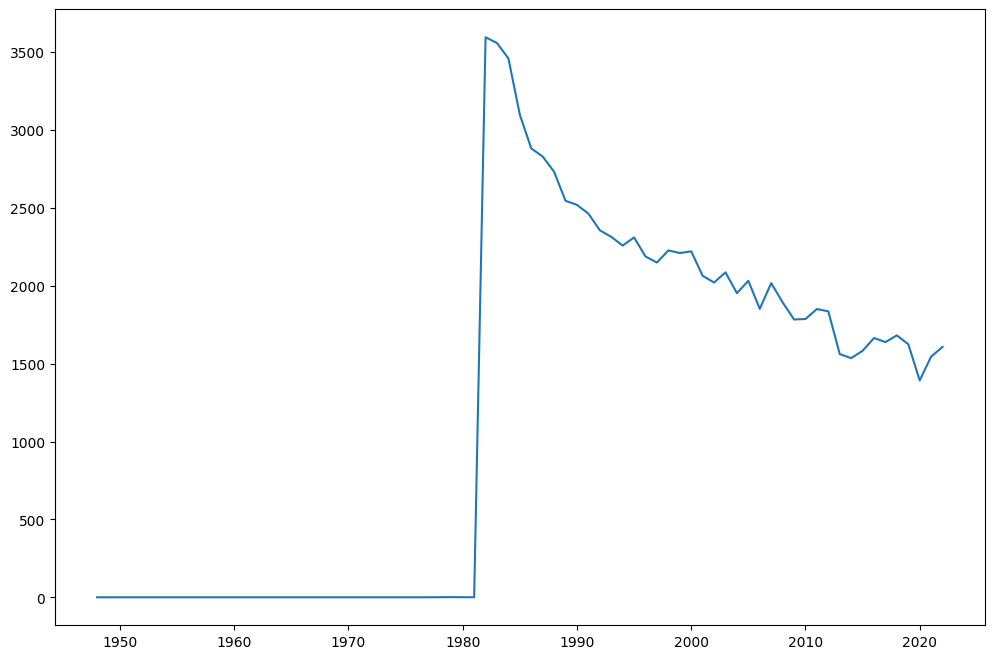

In [20]:
#data visualisation

accidents_by_year = dropped_col_df["Year"].value_counts().sort_index()


plt.figure(figsize=(12,8))
plt.plot(accidents_by_year.index, accidents_by_year.values)

In [21]:
dropped_col_df[dropped_col_df["Year"] < 1982]

#As there are only 3 records between 1962 and 1981, I will ilustrate the trend in accidents' number excluding these records.

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,9
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981,8


In [22]:
original_aviation["Event.Date"] = pd.to_datetime(original_aviation["Event.Date"])
original_aviation["Year"] = original_aviation["Event.Date"].dt.year
original_aviation_1982 = original_aviation[original_aviation["Year"] >=1982]
accidents_by_year_original = original_aviation["Year"].value_counts().sort_index()
accidents_by_year_1982 = original_aviation_1982["Year"].value_counts().sort_index()

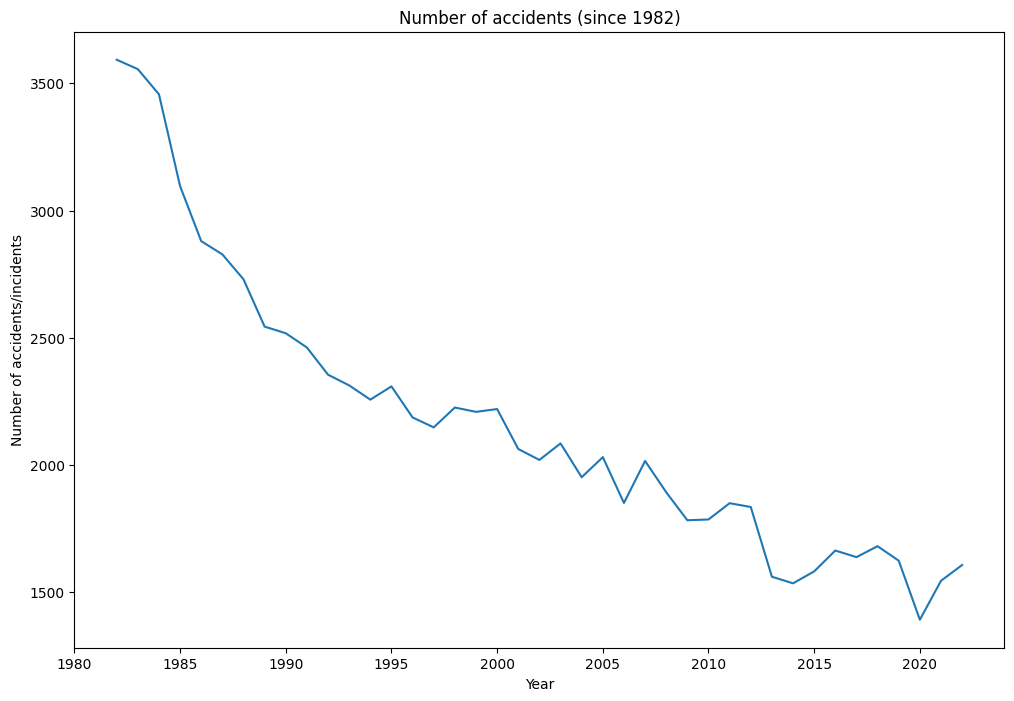

In [23]:
plt.figure(figsize=(12,8))
plt.plot(accidents_by_year_1982.index, accidents_by_year_1982.values)
plt.xlabel("Year")
plt.ylabel("Number of accidents/incidents")
plt.title("Number of accidents (since 1982)")
plt.show()

In [24]:
#creating dataframe of crashes that occurred in the area of the United States
df_usa = dropped_col_df[dropped_col_df["Country"] == "United States"]

In [25]:
import us

all_states = us.states.STATES

for state in all_states:
    print(state)


state_abbr = [state.abbr for state in all_states]

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [26]:
#adding a column with a particular state of USA
df_usa["State"] = df_usa["Location"].str[-2:]
df_usa

/tmp/ipykernel_27229/66544778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["State"] = df_usa["Location"].str[-2:]


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,12,MD
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,NH
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,12,AZ
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,UT


In [27]:
# A heatmap visualising the distribution of aviation accidents around the US
state_counts = df_usa['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

import plotly.express as px
fig = px.choropleth(
    state_counts,
    locations="State",
    locationmode="USA-states",
    color="Count",
    scope="usa",
    title="Distribution of accidents in USA",
    color_continuous_scale= 'Blues',
)
fig.update_layout(
    title=dict(
        x=0.5, 
        y=0.85,  
        xanchor='center',  
        yanchor='top'  
    ),
      legend=dict(
        x=0.3,  
        y=1.02,  
        xanchor='left',  
        yanchor='bottom'  
    )
)

fig.show()

In [28]:
#creating dictionary of seasons

seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}

dropped_col_df["Season"] = dropped_col_df["Month"].map(seasons)

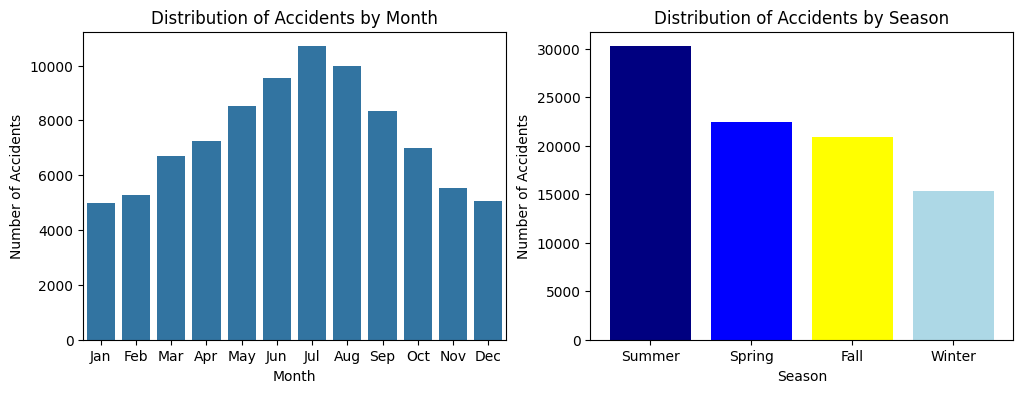

In [29]:
# Plot distribution of accidents by months and seasons

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.countplot(data=dropped_col_df, x='Month', ax=axes[0])
axes[0].set_title('Distribution of Accidents by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Accidents')
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(month_order)


season_colors = {
    'Winter': 'lightblue',
    'Spring': 'blue',
    'Summer': 'navy',
    'Fall': 'yellow'
}


seasonal_accident_counts = dropped_col_df['Season'].value_counts()


axes[1].bar(seasonal_accident_counts.index, seasonal_accident_counts, color=[season_colors.get(season, 'blue') for season in seasonal_accident_counts.index])
axes[1].set_title('Distribution of Accidents by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Accidents')
plt.show()

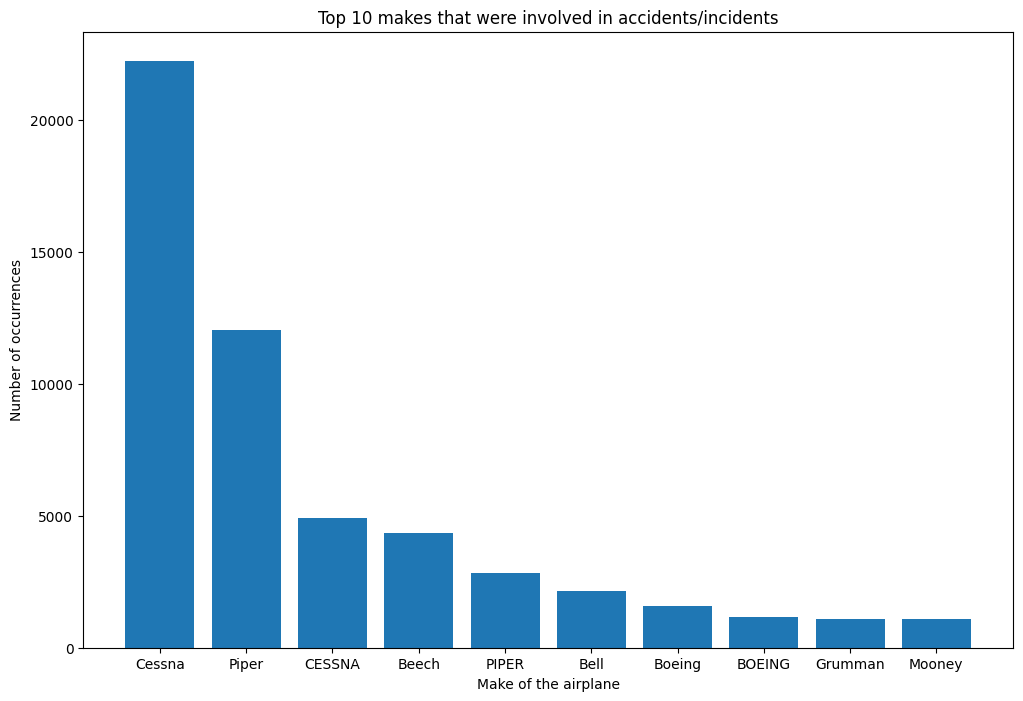

In [30]:
#visualising top 10 Makes 

top_10_makes = dropped_col_df["Make"].value_counts().head(10)

# cmap = cm.get_cmap('Blues', len(top_10_makes))

plt.figure(figsize=(12,8))
plt.bar(top_10_makes.index, top_10_makes.values)

plt.xlabel("Make of the airplane")
plt.ylabel("Number of occurrences")
plt.title("Top 10 makes that were involved in accidents/incidents")
plt.show()



In [31]:
dropped_col_df["Broad.phase.of.flight"].value_counts()


Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [32]:
#landing - percentage of accidents


landing = dropped_col_df[dropped_col_df["Broad.phase.of.flight"] =="Landing"]

len(landing) / len(dropped_col_df)

0.1735647830440212

In [33]:
#takeoff - percentage of accidents


takeoff = dropped_col_df[dropped_col_df["Broad.phase.of.flight"] =="Takeoff"]

len(takeoff) / len(dropped_col_df)

0.1405460743174071

In [34]:
#cruise - percentage of accidents


cruise = dropped_col_df[dropped_col_df["Broad.phase.of.flight"] =="Cruise"]

len(cruise) / len(dropped_col_df)

0.115526105592368

In [35]:
#personal fligths' percentage

personal = dropped_col_df[dropped_col_df["Purpose.of.flight"] == 'Personal']

len(personal) / len(dropped_col_df)


0.5562893046383692

In [36]:
#instructional fligths' percentage

instructional = dropped_col_df[dropped_col_df["Purpose.of.flight"] == 'Instructional']

len(instructional) / len(dropped_col_df)


0.11926110092362384

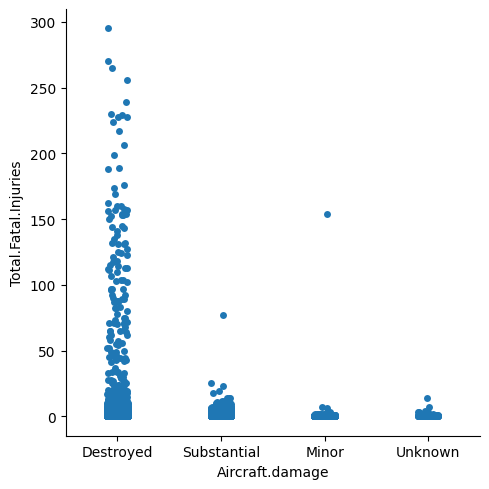

In [37]:
sns.catplot(x='Aircraft.damage',y='Total.Fatal.Injuries',data=dropped_col_df);


In [38]:
# analyzing the total fatal injuries

dropped_col_df["Total.Fatal.Injuries"].describe()

count    77488.000000
mean         0.647855
std          5.485960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64

In [39]:
percentile_99 = np.percentile(dropped_col_df["Total.Fatal.Injuries"], 99)
percentile_99

# In 99% of records the number of casualties is 4 or fewer.

nan

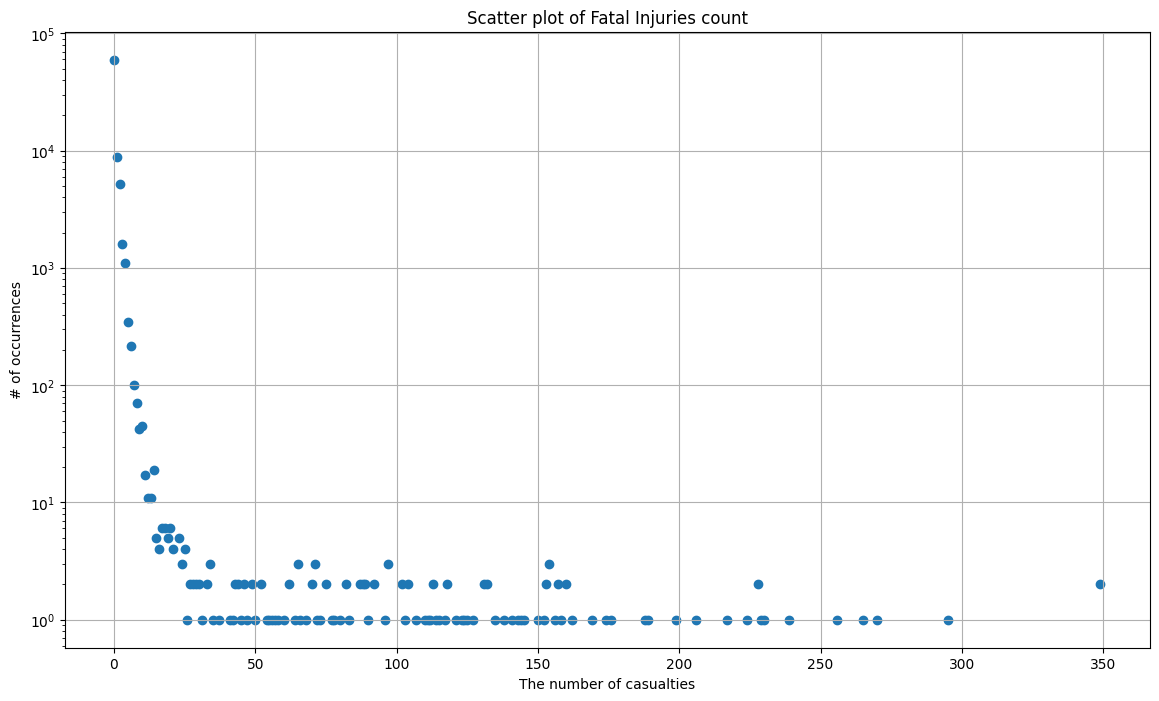

In [40]:
#creating scatter plot to make data more readable / easily visible

counts_fatal = dropped_col_df["Total.Fatal.Injuries"].value_counts()

plt.figure(figsize=(14,8))
plt.scatter(counts_fatal.index, counts_fatal)
plt.yscale("log")
plt.xlabel("The number of casualties")
plt.ylabel("# of occurrences")
plt.title("Scatter plot of Fatal Injuries count")
plt.grid()
plt.show()

In [41]:

dropped_col_df["Death.Ratio"] =  dropped_col_df["Total.Fatal.Injuries"]/(dropped_col_df["Total.Fatal.Injuries"] + dropped_col_df["Total.Serious.Injuries"]+ dropped_col_df["Total.Minor.Injuries"]+ dropped_col_df["Total.Uninjured"])

In [42]:

# Data preprocessing - Pipeline - imputing missing data (for numeric values imputing a mean, for categorical ones imputing the most frequent 
# preparing data for modelling



numeric_features = ["Number.of.Engines"]
categorical_features = ["Investigation.Type", "Aircraft.damage", "Amateur.Built",  "Engine.Type", "Purpose.of.flight", "Weather.Condition", "Broad.phase.of.flight"]

numeric_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="mean")), ('scaling', StandardScaler())])
categorical_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="most_frequent")), ('onehot', OneHotEncoder(sparse_output=False))])


transformer = ColumnTransformer(transformers= [('num', numeric_pipeline, numeric_features),
                                               ('cat', categorical_pipeline, categorical_features)],
                                               
                                              )

transformed_data = pd.DataFrame(transformer.fit_transform(dropped_col_df), columns = transformer.get_feature_names_out())

In [47]:
dropped_col_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,Season,Death.Ratio
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10,Fall,1.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7,Summer,1.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8,Summer,NaN
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6,Summer,1.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8,Summer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,12,Winter,0.0
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,Winter,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,12,Winter,0.0
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,Winter,NaN


In [53]:
# Data preprocessing - Pipeline - imputing missing data (for numeric values imputing a mean, for categorical ones imputing the most frequent 
# preparing data for modelling



numeric_features = ["Number.of.Engines", "Total.Serious.Injuries","Total.Minor.Injuries",
            "Total.Uninjured"]
categorical_features = ["Investigation.Type", "Aircraft.damage", "Amateur.Built",  "Engine.Type", "Purpose.of.flight", "Weather.Condition", "Broad.phase.of.flight", "Engine.Type"]

numeric_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="mean")), ('scaling', StandardScaler())])
categorical_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="most_frequent")), ('onehot', OneHotEncoder(sparse_output=False))])


transformer = ColumnTransformer(transformers= [('num', numeric_pipeline, numeric_features),
                                               ('cat', categorical_pipeline, categorical_features)],
                                               
                                              )

transformed_data = pd.DataFrame(transformer.fit_transform(dropped_col_df), columns = transformer.get_feature_names_out())

In [68]:
#checkin the shape of a newly created DataFrame
transformed_data.shape

(88889, 78)

In [69]:
#checking Nans - no missing values in DF
transformed_data.isna().any().any()

False

In [70]:
# correlation matrix of analyzed data
transformed_data.corr()

,num__Number.of.Engines,num__Total.Serious.Injuries,num__Total.Minor.Injuries,num__Total.Uninjured,cat__Investigation.Type_Accident,cat__Investigation.Type_Incident,cat__Aircraft.damage_Destroyed,cat__Aircraft.damage_Minor,cat__Aircraft.damage_Substantial,cat__Aircraft.damage_Unknown,cat__Amateur.Built_No,cat__Amateur.Built_Yes,cat__Engine.Type_Electric,cat__Engine.Type_Geared Turbofan,cat__Engine.Type_Hybrid Rocket,cat__Engine.Type_LR,cat__Engine.Type_NONE,cat__Engine.Type_Reciprocating,cat__Engine.Type_Turbo Fan,cat__Engine.Type_Turbo Jet,cat__Engine.Type_Turbo Prop,cat__Engine.Type_Turbo Shaft,cat__Engine.Type_UNK,cat__Engine.Type_Unknown,cat__Purpose.of.flight_ASHO,cat__Purpose.of.flight_Aerial Application,cat__Purpose.of.flight_Aerial Observation,cat__Purpose.of.flight_Air Drop,cat__Purpose.of.flight_Air Race show,cat__Purpose.of.flight_Air Race/show,cat__Purpose.of.flight_Banner Tow,cat__Purpose.of.flight_Business,cat__Purpose.of.flight_Executive/corporate,cat__Purpose.of.flight_External Load,cat__Purpose.of.flight_Ferry,cat__Purpose.of.flight_Firefighting,cat__Purpose.of.flight_Flight Test,cat__Purpose.of.flight_Glider Tow,cat__Purpose.of.flight_Instructional,cat__Purpose.of.flight_Other Work Use,cat__Purpose.of.flight_PUBL,cat__Purpose.of.flight_PUBS,cat__Purpose.of.flight_Personal,cat__Purpose.of.flight_Positioning,cat__Purpose.of.flight_Public Aircraft,cat__Purpose.of.flight_Public Aircraft - Federal,cat__Purpose.of.flight_Public Aircraft - Local,cat__Purpose.of.flight_Public Aircraft - State,cat__Purpose.of.flight_Skydiving,cat__Purpose.of.flight_Unknown,cat__Weather.Condition_IMC,cat__Weather.Condition_UNK,cat__Weather.Condition_Unk,cat__Weather.Condition_VMC,cat__Broad.phase.of.flight_Approach,cat__Broad.phase.of.flight_Climb,cat__Broad.phase.of.flight_Cruise,cat__Broad.phase.of.flight_Descent,cat__Broad.phase.of.flight_Go-around,cat__Broad.phase.of.flight_Landing,cat__Broad.phase.of.flight_Maneuvering,cat__Broad.phase.of.flight_Other,cat__Broad.phase.of.flight_Standing,cat__Broad.phase.of.flight_Takeoff,cat__Broad.phase.of.flight_Taxi,cat__Broad.phase.of.flight_Unknown,cat__Engine.Type_Electric,cat__Engine.Type_Geared Turbofan,cat__Engine.Type_Hybrid Rocket,cat__Engine.Type_LR,cat__Engine.Type_NONE,cat__Engine.Type_Reciprocating,cat__Engine.Type_Turbo Fan,cat__Engine.Type_Turbo Jet,cat__Engine.Type_Turbo Prop,cat__Engine.Type_Turbo Shaft,cat__Engine.Type_UNK,cat__Engine.Type_Unknown
num__Number.of.Engines,1.000000,0.032357,0.054979,0.352261,-0.310535,0.310535,0.027689,0.227289,-0.118896,-0.001386,0.104789,-0.104789,0.036495,0.021093,-0.001141,0.075434,-0.012620,-0.322038,0.451849,0.204268,0.195348,-0.001004,-0.001141,-0.130606,0.006738,-0.076315,-0.024580,-0.000405,-0.017004,-0.016429,-0.011245,0.062799,0.121906,-0.006305,0.037304,0.015841,0.012736,-0.018218,-0.077407,-0.020219,-0.001141,0.001610,-0.135188,0.090967,-0.006143,0.008194,-0.003217,-0.001202,0.004651,0.281544,0.138540,0.020985,0.026357,-0.140856,0.033193,0.049942,0.006036,0.028095,-0.001682,-0.029157,-0.074550,-0.000507,0.060497,-0.011161,0.080320,0.000851,0.036495,0.021093,-0.001141,0.075434,-0.012620,-0.322038,0.451849,0.204268,0.195348,-0.001004,-0.001141,-0.130606
num__Total.Serious.Injuries,0.032357,1.000000,0.220255,0.045976,0.022990,-0.022990,0.046455,-0.006041,-0.041334,-0.003720,0.001776,-0.001776,-0.001333,-0.002272,-0.000656,0.033870,-0.000928,-0.051038,0.060644,0.006338,-0.003837,0.014638,-0.000656,0.031871,-0.000650,-0.020031,0.010175,0.001244,-0.002759,0.004786,0.001943,-0.004672,0.000781,-0.000412,-0.007811,-0.001303,0.001162,-0.000513,-0.023596,0.008142,-0.000656,-0.001312,0.011172,-0.006966,0.002854,0.000368,0.008167,0.003272,0.009274,0.023592,0.022469,-0.001458,0.008362,-0.021910,0.012028,0.006594,-0.005067,0.001984,0.004947,-0.004642,0.000499,-0.003222,0.002897,0.005101,-0.017018,-0.008674,-0.001333,-0.002272,-0.000656,0.033870,-0.000928,-0.051038,0.060644,0.006338,-0.003837,0.014638,-0.000656,0.031871
num__Total.Minor.Injuries,0.05

In [71]:
#replacing Nans in Death Ratio column with a mean

death_ratio_mean = dropped_col_df["Death.Ratio"].mean()
dropped_col_df["Death.Ratio"].fillna(death_ratio_mean, inplace=True)

In [72]:

X = transformed_data
y = dropped_col_df["Death.Ratio"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_train.shape, y_test.shape, y_test.shape

((71111, 78), (71111, 78), (17778,), (17778,))

In [73]:
# X_reg = transformed_data

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y, test_size=0.2)



In [74]:
# creating a model to predict fatal injuries 

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [75]:
coefficients = reg_model.coef_

sorted_indices = np.argsort(np.abs(coefficients))[::-1]

In [76]:
sorted_coefficients = coefficients[sorted_indices]

feature_names = transformed_data.columns

In [77]:
for idx, coef in zip(sorted_indices, sorted_coefficients):
    print(f"{feature_names[idx]}: {coef}")

cat__Amateur.Built_No: -4288841327465.9204
cat__Amateur.Built_Yes: -4288841327465.853
cat__Engine.Type_Reciprocating: -3487048943840.893
cat__Engine.Type_Reciprocating: 2963162559963.2373
cat__Engine.Type_Turbo Jet: -2702659449168.767
cat__Engine.Type_Turbo Jet: 2178773065291.1204
cat__Engine.Type_Unknown: -1398295637743.3616
cat__Investigation.Type_Incident: -1292335965727.2175
cat__Investigation.Type_Accident: -1292335965727.1938
cat__Weather.Condition_Unk: 931046260095.1655
cat__Weather.Condition_IMC: 931046260095.0465
cat__Weather.Condition_UNK: 931046260095.0388
cat__Weather.Condition_VMC: 931046260094.8796
cat__Engine.Type_Unknown: 874409253865.6746
cat__Engine.Type_Turbo Shaft: -674618084839.9918
cat__Engine.Type_UNK: -592920319033.7162
cat__Engine.Type_Turbo Prop: -529902858533.18445
cat__Engine.Type_Electric: -491524786752.93787
cat__Engine.Type_Turbo Fan: -476204347342.2827
cat__Engine.Type_Geared Turbofan: -468958161429.521
cat__Engine.Type_NONE: -467144014322.98627
cat__Eng

In [78]:
y_pred_reg = reg_model.predict(X_test)

In [79]:
#ratios mae, mape

reg_mae = mae(y_test, y_pred_reg)

reg_mse = mse(y_test, y_pred_reg)

reg_rmse = np.sqrt(reg_mse)

In [80]:
print(f"Mean squared error: {reg_mse}")
print(f"Root mean squared error: {reg_rmse}")
print(f"Mean absolute error: {reg_mae}")



Mean squared error: 7.676128613359117e+18
Root mean squared error: 2770582720.901709
Mean absolute error: 28091827.180263247


In [81]:
# r2 ratio

r2_reg = r2_score(y_test, y_pred_reg)

print(f"R2 score: {r2_reg}")

R2 score: -6.65465059765188e+19


In [82]:
# creating decision tree model to see which features are the most important in the model

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

In [83]:
#ratios mae, mape, mse, rmse for decision tree

tree_mae = mae(y_test, y_pred_tree)

tree_mape = mape(y_test, y_pred_tree)

tree_mse = mse(y_test, y_pred_tree)

tree_rmse = np.sqrt(tree_mse)

In [84]:
print(f"Mean squared error for decision tree: {tree_mse}")
print(f"Root mean squared error for decision tree: {tree_rmse}")
print(f"Mean absolute error for decision tree: {tree_mae}")
print(f"Mean absolute percentage error for decision tree: {tree_mape}")

Mean squared error for decision tree: 0.008837857256672218
Root mean squared error for decision tree: 0.09400987850578373
Mean absolute error for decision tree: 0.02528611572209695
Mean absolute percentage error for decision tree: 45724433247297.46


In [85]:
# decision tree - looking for the most important features


feature_importances = tree.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [86]:
feature_importance_df.sort_values('Importance', ascending=False).head(10)

,Feature,Importance
6,cat__Aircraft.damage_Destroyed,0.326727
1,num__Total.Serious.Injuries,0.269854
3,num__Total.Uninjured,0.179177
2,num__Total.Minor.Injuries,0.165993
5,cat__Investigation.Type_Incident,0.033124
0,num__Number.of.Engines,0.005726
59,cat__Broad.phase.of.flight_Landing,0.002419
42,cat__Purpose.of.flight_Personal,0.001421
49,cat__Purpose.of.flight_Unknown,0.001146
25,cat__Purpose.of.flight_Aerial Application,0.000974


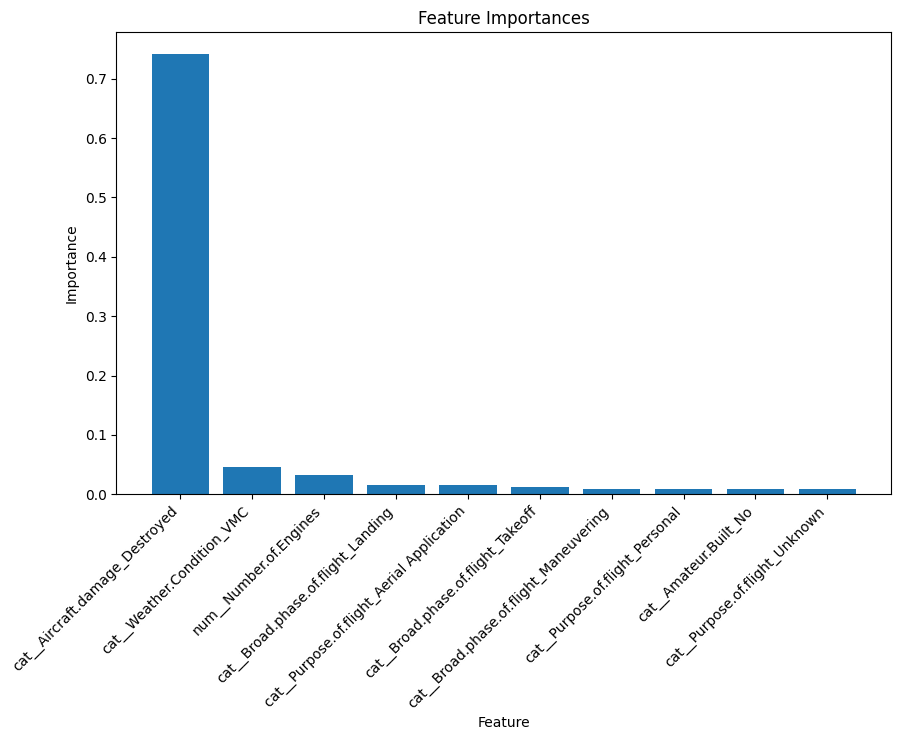

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importance_df['Importance'].head(10), align='center')
plt.xticks(range(10), feature_importance_df['Feature'].head(10), rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [88]:
X_trimmed = transformed_data[['cat__Aircraft.damage_Destroyed', 'cat__Weather.Condition_VMC', 'num__Number.of.Engines', 'cat__Broad.phase.of.flight_Landing', 'cat__Purpose.of.flight_Aerial Application', 'cat__Broad.phase.of.flight_Takeoff']]

X_train_trimmed, X_test_trimmed, y_train, y_test = train_test_split(X_trimmed, y, test_size=0.2)



In [89]:
tree_trimmed = DecisionTreeRegressor(max_depth=4, min_samples_leaf=20).fit(X_train_trimmed, y_train)

y_pred_tree_trimmed = tree_trimmed.predict(X_test_trimmed)


trimmed_tree_mae = mae(y_test, y_pred_tree_trimmed)

trimmed_tree_mape = mape(y_test, y_pred_tree_trimmed)

trimmed_tree_mse = mse(y_test, y_pred_tree_trimmed)

trimmed_tree_rmse = np.sqrt(trimmed_tree_mse)






In [90]:
print(f"Mean squared error for decision tree: {trimmed_tree_mse}")
print(f"Root mean squared error for decision tree: {trimmed_tree_rmse}")
print(f"Mean absolute error for decision tree: {trimmed_tree_mae}")
print(f"Mean absolute percentage error for decision tree: {trimmed_tree_mape}")

Mean squared error for decision tree: 0.07490122067324427
Root mean squared error for decision tree: 0.27368087378047495
Mean absolute error for decision tree: 0.1834060440004893
Mean absolute percentage error for decision tree: 351434096655212.6


In [92]:
# r2 ratio

r2_trimmed_tree = r2_score(y_test, y_pred_tree_trimmed)

print(f"R2 score: {r2_trimmed_tree}")

R2 score: 0.3510706072360328


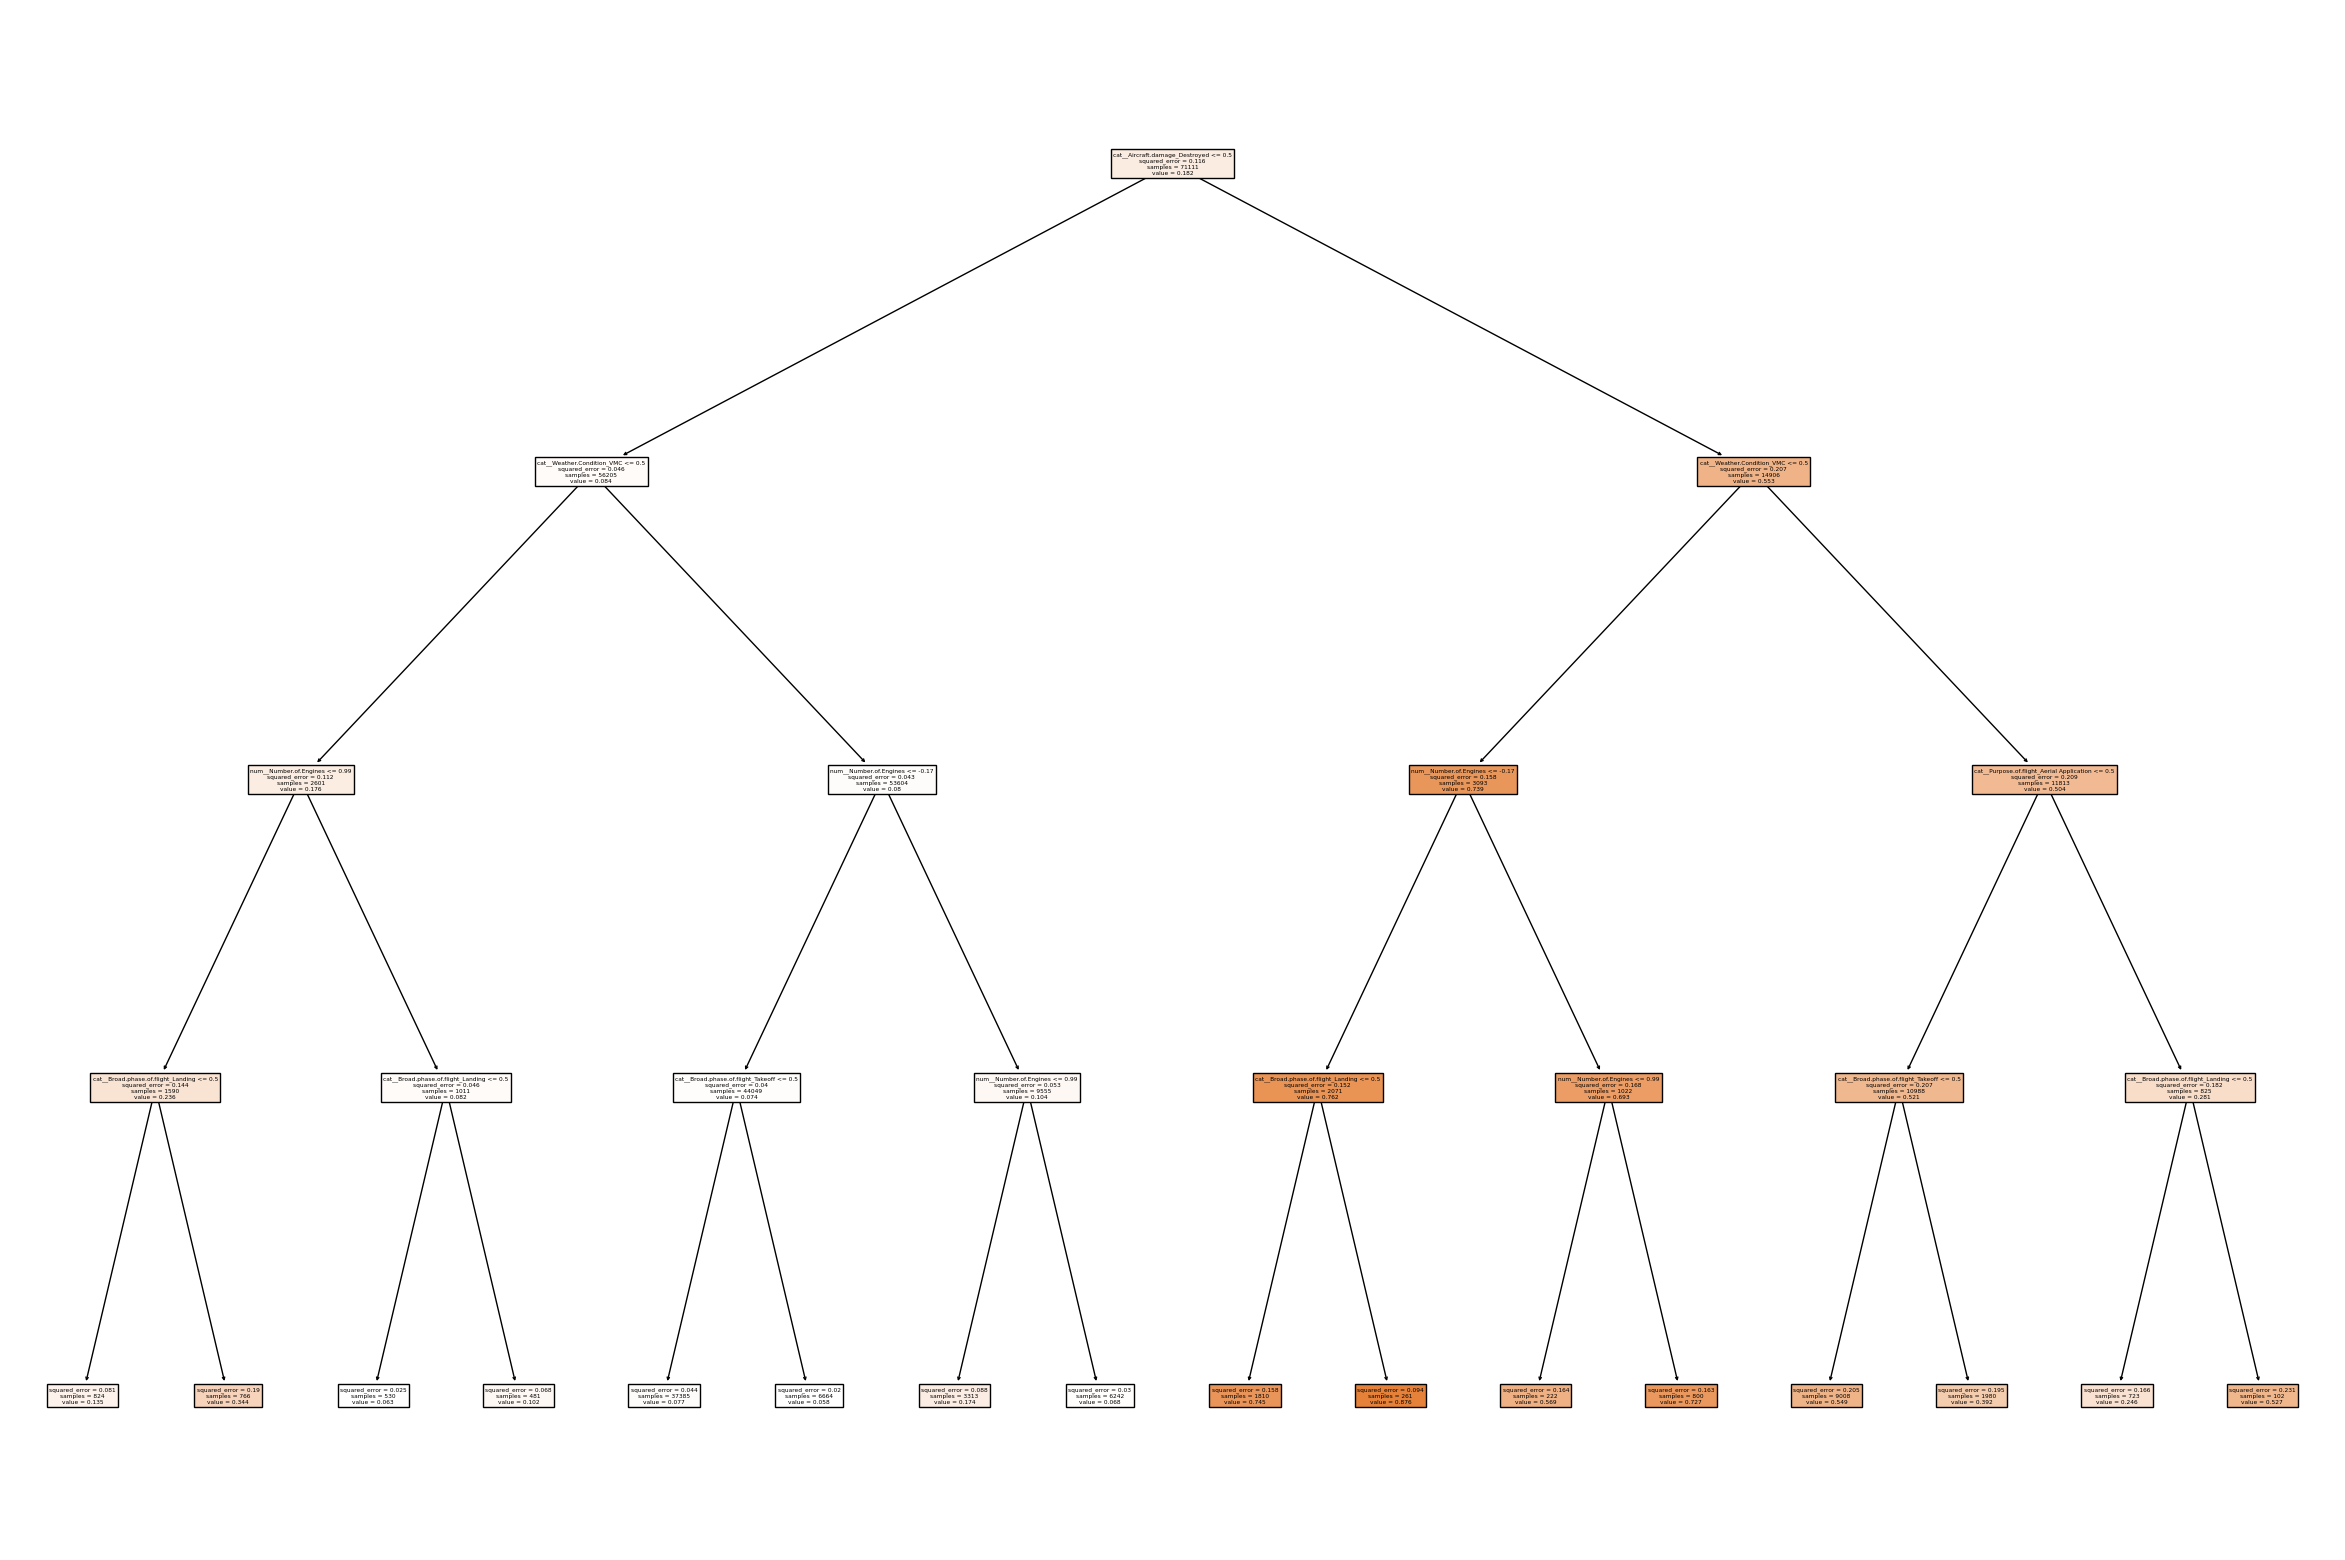

In [93]:
fea_nam = X_trimmed.columns
colors = ['lightblue', 'lightcoral']
plt.figure(figsize=(30,20))
plot_tree(tree_trimmed, feature_names = fea_nam, filled=True)


plt.show()

In [ ]:
# # # random forest
# # # GridSearchCV

# rf_model = RandomForestRegressor(random_state=42)

# param_grid = {'max_depth': [2,3,4,5,6],
#                'n_estimators': [50, 100, 150],
#                'min_samples_split': [200, 300, 400, 600],
#                'min_samples_leaf': [100, 200, 300, 400]}



# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv =5,scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# print("Best Mean Squared Error: ", grid_search.best_score_)


Best Parameters:  {'max_depth': 2, 'min_samples_leaf': 400, 'min_samples_split': 200, 'n_estimators': 150}
Best Mean Squared Error:  -0.11620007462738666


In [94]:
rf_best_param = RandomForestRegressor(max_depth=2, min_samples_leaf=400, min_samples_split=200, n_estimators=150)
rf_best_param.fit(X_train, y_train)

y_pred_rf_best_param = rf_best_param.predict(X_test)

In [95]:
rf_best_param_mae = mae(y_test, y_pred_rf_best_param)

rf_best_param_mape = mape(y_test, y_pred_rf_best_param)

rf_best_param_mse = mse(y_test, y_pred_rf_best_param)

rf_best_param_rmse = np.sqrt(rf_best_param_mse)



In [96]:
print(f"Mean squared error for random forest: {rf_best_param_mse}")
print(f"Root mean squared error for random forest: {rf_best_param_rmse}")
print(f"Mean absolute error for random forest: {rf_best_param_mae}")
print(f"Mean absolute percentage error for random forest: {rf_best_param_mape}")

Mean squared error for random forest: 0.1154225099875306
Root mean squared error for random forest: 0.3397388850095476
Mean absolute error for random forest: 0.24003858750485058
Mean absolute percentage error for random forest: 543351339725973.44


In [97]:
# r2 ratio

r2_rf_best_param = r2_score(y_test, y_pred_rf_best_param)

print(f"R2 score: {r2_rf_best_param}")

R2 score: 2.1542471757562964e-06


In [99]:
dropped_col_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,Season,Death.Ratio
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10,Fall,1.000000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7,Summer,1.000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8,Summer,0.181864
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6,Summer,1.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8,Summer,0.181864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,12,Winter,0.000000
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,Winter,0.181864
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,12,Winter,0.000000
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,Winter,0.181864


In [105]:
# integer encoding 
aviation['Investigation.Type'] = aviation['Investigation.Type'].astype('category').cat.codes
aviation['Aircraft.damage'] = aviation['Aircraft.damage'].astype('category').cat.codes
aviation['Aircraft.Category'] = aviation['Aircraft.Category'].astype('category').cat.codes
aviation['Engine.Type'] = aviation['Engine.Type'].astype('category').cat.codes
aviation['Purpose.of.flight'] = aviation['Purpose.of.flight'].astype('category').cat.codes
aviation['Weather.Condition'] = aviation['Weather.Condition'].astype('category').cat.codes
aviation['Broad.phase.of.flight'] = aviation['Broad.phase.of.flight'].astype('category').cat.codes

In [109]:

aviation["Death.Ratio"] =  aviation["Total.Fatal.Injuries"]/(aviation["Total.Fatal.Injuries"] + aviation["Total.Serious.Injuries"]+ aviation["Total.Minor.Injuries"]+ aviation["Total.Uninjured"])

In [121]:
aviation = aviation[aviation['Death.Ratio'].notna()]

In [122]:
aviation['Total.Uninjured'].fillna(aviation['Total.Uninjured'].mean(), inplace=True)
aviation['Total.Minor.Injuries'].fillna(aviation['Total.Minor.Injuries'].mean(), inplace=True)
aviation['Total.Serious.Injuries'].fillna(aviation['Total.Serious.Injuries'].mean(), inplace=True)
aviation['Number.of.Engines'].fillna(aviation['Number.of.Engines'].mean(), inplace=True)

/tmp/ipykernel_27229/1478658070.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_27229/1478658070.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_27229/1478658070.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_27229/1478658070.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [123]:
aviation['Aircraft.Category'].fillna('Unknown',inplace=True)

aviation['Engine.Type'].fillna('Others',inplace=True)
aviation['Engine.Type'].replace(['None','Unknown'],'Others')

aviation['Purpose.of.flight'].fillna('Unknown',inplace=True)
aviation['Weather.Condition'].fillna('UNK',inplace=True)
aviation['Broad.phase.of.flight'].fillna('UNKNOWN',inplace=True)

/tmp/ipykernel_27229/1097969580.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_27229/1097969580.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_27229/1097969580.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_27229/1097969580.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [124]:
# prepare pre
X_new = aviation[['Investigation.Type','Aircraft.damage','Aircraft.Category',
            'Number.of.Engines','Engine.Type','Purpose.of.flight',
            'Total.Serious.Injuries','Total.Minor.Injuries',
            'Total.Uninjured','Weather.Condition','Broad.phase.of.flight'
    ]]

y_new = aviation['Death.Ratio']


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.25,shuffle=True)

print('Training Features Shape:', X_train_new.shape)
print('Training Labels Shape:', y_train_new.shape)
print('Testing Features Shape:', X_test_new.shape)
print('Testing Labels Shape:', y_test_new.shape)

Training Features Shape: (54957, 11)
Training Labels Shape: (54957,)
Testing Features Shape: (18319, 11)
Testing Labels Shape: (18319,)


In [125]:
reg_model_new = LinearRegression()
reg_model_new.fit(X_train_new, y_train_new)

LinearRegression()

In [126]:
print('Intercept of Regression \t: b = ', reg_model_new.intercept_)
print('Coefficients of Regression \t: a = ', reg_model_new.coef_)
print()
# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train_new.columns, reg_model_new.coef_)), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  0.9278131871225344
Coefficients of Regression 	: a =  [-0.4306552  -0.21681639  0.01007607  0.02520338 -0.0028983   0.00336348
 -0.01891581 -0.01304238 -0.00174137 -0.06548393 -0.00607837]



,Predictors,Coefficients
0,Investigation.Type,-0.430655
1,Aircraft.damage,-0.216816
2,Aircraft.Category,0.010076
3,Number.of.Engines,0.025203
4,Engine.Type,-0.002898
5,Purpose.of.flight,0.003363
6,Total.Serious.Injuries,-0.018916
7,Total.Minor.Injuries,-0.013042
8,Total.Uninjured,-0.001741
9,Weather.Condition,-0.065484


In [127]:
y_pred_reg_new = reg_model_new.predict(X_test_new)

In [129]:
reg_model_new_mae = mae(y_test_new, y_pred_reg_new)



reg_model_new_mse = mse(y_test_new, y_pred_reg_new)

reg_model_new_rmse = np.sqrt(reg_model_new_mse)



In [130]:
print(f"Mean squared error for decision tree: {reg_model_new_mse}")
print(f"Root mean squared error for decision tree: {reg_model_new_rmse}")
print(f"Mean absolute error for decision tree: {reg_model_new_mae}")


Mean squared error for decision tree: 0.089559861410101
Root mean squared error for decision tree: 0.29926553662274746
Mean absolute error for decision tree: 0.19714108546922363


In [135]:
# r2 ratio

r2_reg_lin_new = r2_score(y_test_new, y_pred_reg_new)

print(f"R2 score: {r2_reg_lin_new}")

R2 score: 0.3599948215817603


In [134]:
rf_new = RandomForestRegressor(n_estimators=100)
rf_new.fit(X_train_new, y_train_new)

y_rf_new_pred = rf_new.predict(X_test_new)

In [137]:
# r2 ratio

r2_rf_new = r2_score(y_test_new, y_rf_new_pred)

print(f"R2 score: {r2_rf_new}")

R2 score: 0.951498030876496


In [140]:

feature_importances = rf_new.feature_importances_
feature_names = X_new.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [141]:
feature_importance_df.sort_values('Importance', ascending=False).head(10)

,Feature,Importance
6,Total.Serious.Injuries,0.366486
8,Total.Uninjured,0.358427
7,Total.Minor.Injuries,0.246338
5,Purpose.of.flight,0.007747
1,Aircraft.damage,0.005996
10,Broad.phase.of.flight,0.005427
4,Engine.Type,0.002865
3,Number.of.Engines,0.002336
9,Weather.Condition,0.002264
2,Aircraft.Category,0.001982
